## План работы

[1. Подготовка данных](#1.)<br>
[1.1. Откроем и изучим данные](#1.1.)<br>
[1.2. Проведем предобработку данных](#1.2.)<br>
[1.3. Преобразуем данные](#1.3.)<br>
[2. Обучение моделей и поиск лучших гиперпараметров](#2.)<br>
[3. Финальное тестирование и анализ модели](#3.)<br>

# 1. Подготовка данных <a id = "1."> </a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore') 
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100
%matplotlib inline

toxic_comments = pd.read_csv(r'E:\Документы прочие\IT\Яндекс практикум\Project\11 Машинное обучение текстов\toxic_comments.csv')

def data_info(data):
    '''
    Функция принимает в качестве аргументов датасет.
    Функция выводит информацию о датасете и первые 50 строк датасета, а также количество дубликатов.
    '''
    data.info()
    display(data.head(50))
    print('Количество дубликатов в данных:', data.duplicated().sum())

## 1.1. Откроем и изучим данные <a id = "1.1."> </a>

Мы будем использовать датасет toxic_comments, который содержит комментарии пользователей.

In [2]:
data_info(toxic_comments)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    159571 non-null  object
 1   toxic   159571 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ MB


,text,toxic
0,Explanation\nWhy the edits made under my usern...,0
1,D'aww! He matches this background colour I'm s...,0
2,"Hey man, I'm really not trying to edit war. It...",0
3,"""\nMore\nI can't make any real suggestions on ...",0
4,"You, sir, are my hero. Any chance you remember...",0
5,"""\n\nCongratulations from me as well, use the ...",0
6,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1
7,Your vandalism to the Matt Shirvington article...,0
8,Sorry if the word 'nonsense' was offensive to ...,0
9,alignment on this subject and which are contra...,0


Количество дубликатов в данных: 0


Датасет toxic_comments размером в 159571 строк и содержит данные 2-х типов: int64, object. Данные не содержат пропусков и дубликатов.

## 1.2. Проведем предобработку данных <a id = "1.2."> </a>

#### 1. Приведем все комментарии к нижнему регистру

In [3]:
toxic_comments['text'] = toxic_comments['text'].str.lower()

#### 2. Очистим комментарии от лишних символов

In [4]:
import re

def clear_text(text):
    '''
    Функция считывает строку.
    Функция возвращает лемматизированную строку в котрой остались только латинские символы и пробелы.
    '''
    return " ".join(re.sub(r'[^a-zA-Z ]', ' ', text).split())

# очищаем комментарии от символов
toxic_comments['text_re'] = toxic_comments['text'].apply(clear_text)

#### 3. Проведем лемматизацию комментариев

In [5]:
import nltk
from nltk.stem import WordNetLemmatizer

def lemmatize(text):
    '''
    Функция считывает строку.
    Функция возвращает лемматизированную строку.
    '''
    lemmatizer = WordNetLemmatizer() 
    lemm_list = lemmatizer.lemmatize(text)
    lemm_text = "".join(lemm_list)
    return lemm_text

# лемматизация комментариев
toxic_comments['text_re_lemm'] = toxic_comments['text_re'].apply(lemmatize)

## 1.3. Преобразуем данные <a id = "1.3."> </a>

Преобразуем данные для решения задачи с помощью 2-х методов:
1. 1 метод: TF-IDF, в котором признаки — это слова из корпуса и их величины TF-IDF для каждого текста.
2. 2 метод: DistilBERT, в котором мы воспользуемся обученным DistilBERT'ом для создания эмбеддингов для каждого текста.

### 1 метод: TF-IDF

1. Разобьем датасет на обучающую и тестовую выборки

In [6]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(toxic_comments, test_size = 0.25, random_state = 42)

Проанализируем дисбаланс классов обучающей выборки.

In [37]:
cls_count_1 = train['toxic'].value_counts()
display(cls_count_1)

0    107512
1     12166
Name: toxic, dtype: int64

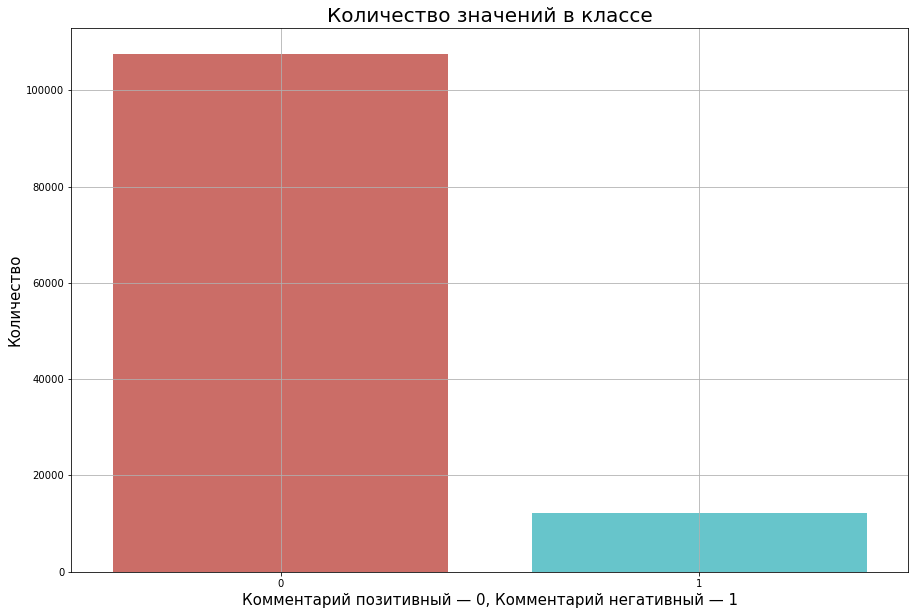

In [36]:
plt.figure(figsize=(15,10))
sns.countplot(x='toxic', data = train, palette = 'hls')
plt.title('Количество значений в классе',fontsize=20)
plt.xlabel('Комментарий позитивный — 0, Комментарий негативный — 1', fontsize=15)
plt.ylabel('Количество', fontsize=15)
plt.grid(True)
plt.show()

Наблюдается сильный дисбаланс классов в обучающей выборке. Чтобы убрать дисбаланс в моделях будем использовать гиперпараметр "balanced".

2. Создадим корпусы текстов и выделим целевые признаки

In [7]:
from nltk.corpus import stopwords as nltk_stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

# создадим корпус текстов
corpus_train = train['text_re_lemm']
corpus_test = test['text_re_lemm']

# определим целево признаки
y_train = train['toxic']
y_test = test['toxic']

3. Определим стоп-слова из бибилотеки nltk для их последующей очистки из счетчика

In [8]:
# определим стоп-слова из бибилотеки nltk для их последующей очистки
nltk.download('stopwords')
stopwords = set(nltk_stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\chern\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


4. Создадим признаки для обучающей и тестовой выборки посчитав tf_idf для корпусов обучающей и тестовой выборки

In [9]:
# создадим счётчик, указав в нём стоп-слова
count_tf_idf = TfidfVectorizer(stop_words=stopwords)
# обучим счетчик на обучающей выборке
count_tf_idf.fit(corpus_train)
# создадим признаки для обучающей и тестовой выборки посчитав tf_idf для корпусов обучающей и тестовой выборки
X_train = count_tf_idf.transform(corpus_train)
X_test = count_tf_idf.transform(corpus_test)

### 2 метод: DistilBERT

In [10]:
import torch
from tqdm import notebook
import sys
import os
import time

USE_GPU = True

# проверка на использование и доступность cuda в torch
if USE_GPU and torch.cuda.is_available():
    print('using device: cuda')
else:
    print('using device: cpu')

# иницализируем cuda девайс
use_cuda = not False and torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")

using device: cuda


1. Загрузим предобученную модель и токенизатор DistilBERT

In [11]:
import transformers
tokenizer = transformers.DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
model = transformers.DistilBertModel.from_pretrained('distilbert-base-uncased').to(device)

2. Проведем токенизацию (преобразуем каждое предложение в список идентификаторов). Возьмем предложения очищенные от символов. Лемматизация не требуется, так как DistilBERT понимает формы слов.

In [12]:
%%time
# add_special_token добавляет токены в начале и конце каждого предложения
tokenized = toxic_comments['text_re'].apply(lambda x: tokenizer.encode(x[:512], add_special_tokens=True))

Wall time: 3min 32s


3. Приведем все векторы к одной длине, так как это условие работы модели BERT

In [13]:
# создадим счетчик, который определит максимальную длину вектора
max_len = 0
for i in tokenized.values:
    if len(i) > max_len:
        max_len = len(i)
        
# приведем полученные векторы к максимальному размеру путем прибавления к более коротким векторам идентификатора 0 (padding)
padded = np.array([i + [0]*(max_len - len(i)) for i in tokenized.values])
np.array(padded).shape

(159571, 277)

4. Теперь поясним модели, что нули в векторах не несут значимой информации. Это нужно для компоненты модели - attention. Отбросим эти токены и «создадим маску» для действительно важных токенов, то есть укажем нулевые и не нулевые значения.

In [14]:
attention_mask = np.where(padded != 0, 1, 0)
print(attention_mask.shape)

(159571, 277)


5. Воспользуемся обученным DistilBERT'ом для создания эмбеддингов для каждого текста по 100 текстов в батче.

In [15]:
print(time.ctime())

if USE_GPU and torch.cuda.is_available():
    print('using GPU...')
    batch_size = 100
    embeddings = []
    for i in notebook.tqdm(range(padded.shape[0] // batch_size)):
        batch = torch.LongTensor(padded[batch_size*i:batch_size*(i+1)]).to(device)  
        attention_mask_batch = torch.LongTensor(attention_mask[batch_size*i:batch_size*(i+1)]).to(device) 
        
        with torch.no_grad():
            batch_embeddings = model(batch, attention_mask=attention_mask_batch) 
        
        embeddings.append(batch_embeddings[0][:,0,:].cpu().numpy())
        
print(time.ctime())

Wed Jun 24 01:03:05 2020
using GPU...



Wed Jun 24 01:17:33 2020


6. Объединяем эмбеддинги для каждого текста, которые получились по результатам.

In [16]:
X_bert = np.concatenate(embeddings)

7. Разделяем данные на обучающую и тестовую выборки

In [17]:
y_bert = toxic_comments['toxic'].iloc[0:159500]
X_bert_train, X_bert_test, y_bert_train, y_bert_test = train_test_split(X_bert, y_bert, test_size = 0.25, random_state = 42)

Проанализируем дисбаланс классов обучающей выборки.

In [44]:
cls_count_2 = y_bert_train.value_counts()
display(cls_count_2)

0    107498
1     12127
Name: toxic, dtype: int64

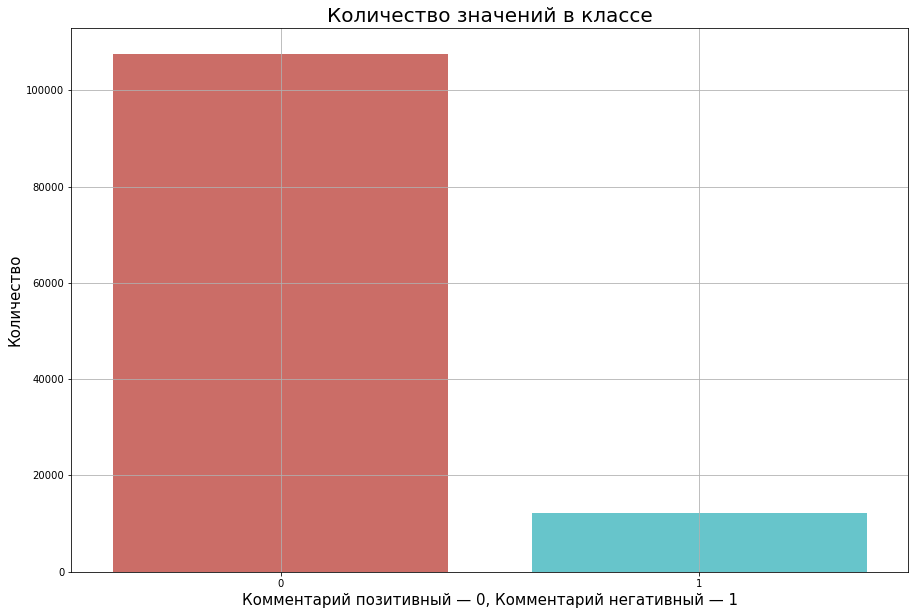

In [47]:
plt.figure(figsize=(15,10))
sns.countplot(x=y_bert_train, palette = 'hls')
plt.title('Количество значений в классе',fontsize=20)
plt.xlabel('Комментарий позитивный — 0, Комментарий негативный — 1', fontsize=15)
plt.ylabel('Количество', fontsize=15)
plt.grid(True)
plt.show()

Наблюдается сильный дисбаланс классов в обучающей выборке. Чтобы убрать дисбаланс в моделях будем использовать гиперпараметр "balaced".

### Вывод

Была изучена общая информация о полученных данных. Также данные были проверены на дубликаты и пропуски. Текстовые данные были очищены от стоп-слов, символов и тексты были лемматизированы. Далее тексты были преобразованы в векторные представления для решения задачи бинарной классиффикации с помощью 2-х методов.

# 2. Обучение моделей и поиск лучших гиперпараметров <a id = "2."> </a>

Задача, которую необходимо решить, относится к задаче с бинарной классификацией, так как ее целевой признак состоит из 2-х категорий (комментарий токсичный и не токсичный). Нам понадобится обучить модели и подобрать для них наилучшие гиперпараметры. Модель с лучшей метрикой F1 выберем для тестирования.

### LogisticRegression

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

def lr_gridsearchcv(features, target):
    '''
    Функция принимает в качестве аргументов: признаки и целевой признак для обучения.
    Функция выдает словарь с лучшими гиперпараметрами для модели логистической регрессии.
    '''
    model = LogisticRegression()
    param_grid = { 
        'random_state': [42],
        'solver': ['liblinear'],
        'penalty': ['l1', 'l2'],
        'class_weight' : ['balanced']
    }
    CV = GridSearchCV(estimator = model, param_grid = param_grid, cv= 3, scoring = 'f1')
    CV.fit(features, target)
    print('Лучшие гиперпараметры: ', CV.best_params_)
    print('Лучшая F1-мера: {:.2f}'.format(CV.best_score_))
    return CV.best_params_

Подберем лучшие гиперпараметры для модели LogisticRegression.

1. С признаками, полученными 1 методом

In [19]:
%%time
best_params_lr_1 = lr_gridsearchcv(X_train, y_train)

Лучшие гиперпараметры:  {'class_weight': 'balanced', 'penalty': 'l1', 'random_state': 42, 'solver': 'liblinear'}
Лучшая F1-мера: 0.75
Wall time: 4min 9s


Модель логистической регрессии с подобранными гиперпараметрами показывает хороший уровень прогнозирования класса F1 = 0.75, что равно минимально допустимому значению 0.75 из условия задачи.

2. С признаками, полученными 2 методом

In [20]:
%%time
best_params_lr_2 = lr_gridsearchcv(X_bert_train, y_bert_train)

Лучшие гиперпараметры:  {'class_weight': 'balanced', 'penalty': 'l2', 'random_state': 42, 'solver': 'liblinear'}
Лучшая F1-мера: 0.66
Wall time: 2h 32min 14s


Модель логистической регрессии с подобранными гиперпараметрами показывает средний уровень прогнозирования класса F1 = 0.66, что меньше допустимого значению 0.75 из условия задачи.

### LGBMClassifier

In [21]:
import lightgbm as lgb

def lgbm_cls_gridsearchcv(features, target):
    '''
    Функция принимает в качестве аргументов: признаки и целевой признак для обучения.
    Функция выдает словарь с лучшими гиперпараметрами и лучшее значение метрики для модели LGBMRegressor.
    '''
    model = lgb.LGBMClassifier()
    param_grid = {
            'boosting_type': ['gbdt', 'dart'],
            'objective': ['binary'],
            'metric': ['f1'],
            'n_estimators': [300],
            'learning_rate': [0.03, 0.1, 0.15],
            'max_depth': np.arange(4, 7),
            'random_state': [42],
            'class_weight': ['balanced']
    }
    CV = GridSearchCV(estimator = model, param_grid = param_grid, cv= 3, scoring = 'f1')
    CV.fit(features, target)
    print('Лучшие гиперпараметры: ', CV.best_params_)
    print('Лучшая F1-мера: {:.2f}'.format(CV.best_score_))
    return CV.best_params_ 

Подберем лучшие гиперпараметры для модели LGBMClassifier.

1. С признаками, полученными 1 методом

In [22]:
%%time
best_params_lgbm_cls_1 = lgbm_cls_gridsearchcv(X_train, y_train)

Лучшие гиперпараметры:  {'boosting_type': 'gbdt', 'class_weight': 'balanced', 'learning_rate': 0.15, 'max_depth': 6, 'metric': 'f1', 'n_estimators': 300, 'objective': 'binary', 'random_state': 42}
Лучшая F1-мера: 0.74
Wall time: 9min 30s


Модель градиентного бустинга с подобранными гиперпараметрами показывает хороший уровень прогнозирования класса F1 = 0.74, что меньше минимально допустимого значения 0.75 из условия задачи.

2. С признаками, полученными 2 методом

In [23]:
%%time
best_params_lgbm_cls_2 = lgbm_cls_gridsearchcv(X_bert_train, y_bert_train)

Лучшие гиперпараметры:  {'boosting_type': 'gbdt', 'class_weight': 'balanced', 'learning_rate': 0.15, 'max_depth': 6, 'metric': 'f1', 'n_estimators': 300, 'objective': 'binary', 'random_state': 42}
Лучшая F1-мера: 0.72
Wall time: 21min 20s


Модель градиентного бустинга с подобранными гиперпараметрами показывает хороший уровень прогнозирования класса F1 = 0.72, что меньше минимально допустимого значения 0.75 из условия задачи.

### Вывод

Для финального тестирования мы будем использовать модель логистической регрессии с признаками, полученными с помощью TF-IDF, так как она показала лучшую метрику F1 на кросс-валидации.

# 3. Финальное тестирование и анализ модели <a id = "3."> </a>

Проведите финальное тестирование.

In [24]:
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

def ml(model, features_train, target_train, features_valid, target_valid):
    '''
    Функция принимает в качестве аргументов: модель, признаки и целевой признак выборки для обучения и тестирования.
    Функция обучает заданную модель по обучающей выборке и расчитывает метрики по тестовой выборке: accuracy, F1-меру.
    '''
    model.fit(features_train, target_train)
    predictions = model.predict(features_valid)
    accuracy = accuracy_score(target_valid, predictions)
    print('Точность модели:{:.2%}'. format(accuracy))
    print('F1-мера: {:.4f}'. format(f1_score(target_valid, predictions)))

def roc(model, features_valid, target_valid):
    '''
    Функция принимает в качестве аргументов: модель, признаки и целевой признак для тестирования.
    Функция строит ROC-кривую модели, ROC-кривую случайной модели модели и высчитывает AUC-ROC.
    '''
    #расчитываем fpr и tpr
    probabilities_valid = model.predict_proba(features_valid)
    probabilities_one_valid = probabilities_valid[:, 1]
    fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)
    plt.figure(figsize = (15,10))
    # ROC-кривая нашей модели
    plt.plot(fpr, tpr, linestyle='-')
    # ROC-кривая случайной модели
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.title('ROC-кривая')
    plt.xlabel('False Positive Rate') 
    plt.ylabel('True Positive Rate')
    plt.show()
    # вычисляем AUC_ROC
    auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
    print('AUC-ROC: {:.2f}'.format(auc_roc))

Точность модели:94.37%
F1-мера: 0.7569


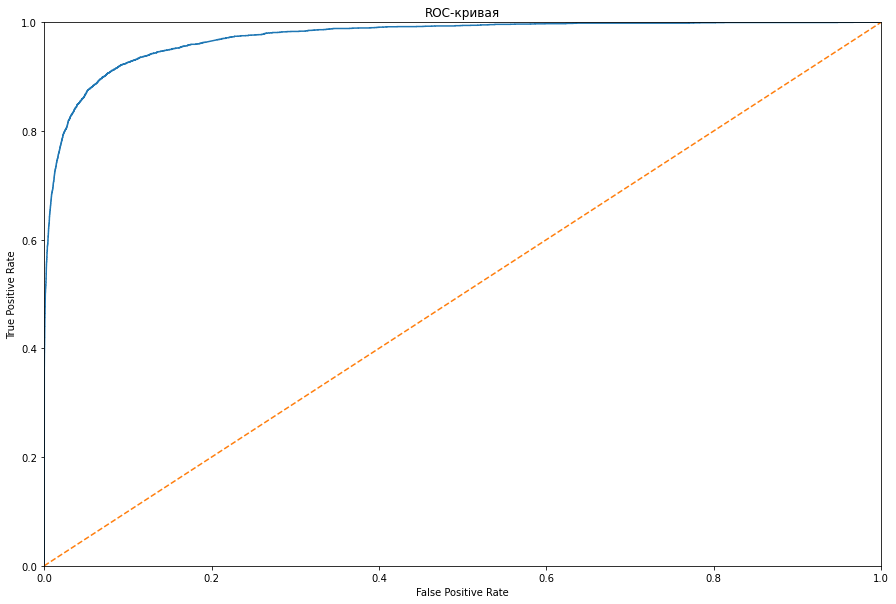

AUC-ROC: 0.97


In [49]:
model_lr = LogisticRegression(**best_params_lr_1)
ml(model_lr, X_train, y_train, X_test, y_test)
roc(model_lr, X_test, y_test)

### Вывод

Выбранная модель логистической регрессии показывает выоскую точность - 94.37%,  уровень прогнозирования класса также высокий и составил F1 = 0.7569, что на уровне 0.75 из условия задачи. ROC-кривая демонстрирует хорошее качество модели (доля истинно положительных ответов больше доли ложноположительных ответов). Площадь фигуры под ROC-кривой составила 0.97, что является отличным показателем.

## ИТОГ

Была изучена общая информация о полученных данных. Также данные были проверены на дубликаты и пропуски. Текстовые данные были очищены от стоп-слов, символов и тексты были лемматизированы. Далее тексты были преобразованы в векторные представления для решения задачи бинарной классиффикации с помощью 2-х методов: TF_IDF и BERT. Для решения задачи классификации были выбраны 2 модели: логистическая регрессия и градиентный бустинг. Для этих модели были подобраны лучшие гиперпараметры. Для борьбы с дисбалансом классов был применен гиперпараметр "balanced". Финальная модель была протестирована, ее метрики были проанализированы.